# Задание 1 (numpy + matplotlib)

---

Напишите программу, которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​	
* На вход программа должна принимать 2 строки (т.е. должен быть реализован ввод с клавиатуры). Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.
* Систему уравнений необходимо решить матричным способом. Предусмотрите случаи, когда решения есть, решений нет, решений бесконечно много. Выведите ответ. Если решения есть, постройте график и точкой отметьте решение (если оно одно).

Введите 3 числа через пробел: 1 2 3
Введите 3 числа через пробел: 1 2 3
Бесконечно много решений


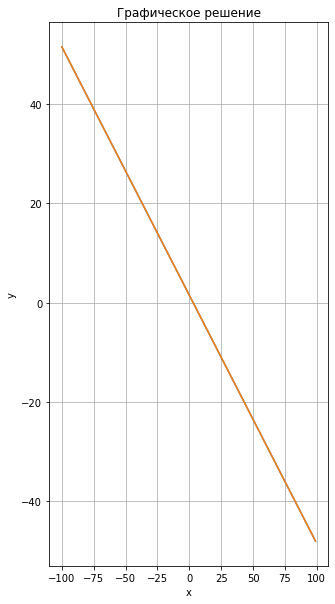

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

array1 = [int(i) for i in input('Введите 3 числа через пробел: ').split()]
a1, b1 = array1[:2], array1[2:]
array2 = [int(i) for i in input('Введите 3 числа через пробел: ').split()]
a2, b2 = array2[:2], array2[2:]
a = np.array([a1, a2])
b = np.array([b1, b2])
det = np.linalg.det(a)
solve_exist = False
if det == 0:
  if (a1[0] / a2[0]) == (a1[1] / a2[1]) == (b1[0]/b2[0])  :
    print('Бесконечно много решений')
    x = list(range(-100, 100))
  else:
    print('Решений нет')
    x = list(range(-100, 100))
else:
  inv_a = np.linalg.inv(a)
  solve = np.dot(inv_a,b)
  print(f'Решение:\n {solve}')
  solve_exist = True
  l_limit = solve - 80
  l_limit = l_limit.astype(int)
  left_limit = l_limit[1][0]
  r_limit = solve + 80
  r_limit = r_limit.astype(int)
  right_limit = r_limit[1][0]
  x = list(range(left_limit, right_limit))

_, ax = plt.subplots(figsize=(5, 10)) 
y1 = [(array1[2]- x1*array1[0])/array1[1] for x1 in x] 
y2 = [(array2[2]- x2*array2[0])/array2[1] for x2 in x]
ax.plot(x, y2) 
ax.plot(x, y1) 
ax.set_xlabel("x") 
ax.set_ylabel("y") 
ax.set_title("Графическое решение") 
ax.grid(True) 

if solve_exist:
  ax.scatter(solve[0], solve[1])


# Задание 2 (pytorch + matplotlib)

Пусть $f(x) = \sin(x) * x$. Постройте график $f(x)$ и $\frac{df(x)}{dx}$, , для расчета производных воспользуйтесь методом `backward()` и matplotlib для построения графиков.

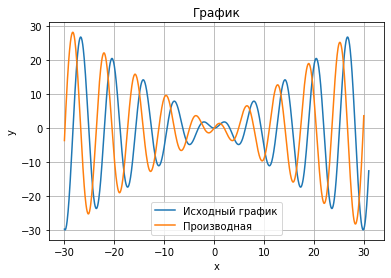

In [ ]:
import matplotlib.pyplot as plt 
import torch
from torch import autograd
import numpy as np

left_limit = -30
right_limit = 31

x = torch.arange(left_limit,right_limit).type(torch.float)
x = x.requires_grad_()
y = torch.sin(x)*x
q = torch.ones((right_limit - left_limit))
y.backward(torch.FloatTensor(q))
derivative = x.grad

# Изображаем график исходной функции
fig = plt.subplots()
x = np.linspace(left_limit, right_limit, 1000 )
y = lambda x: np.sin(x)*x
plt.plot(x, y(x), label='Исходный график')
plt.grid(True)
plt.xlabel("x") 
plt.ylabel("y") 
plt.title("График") 
plt.grid(True); 

# Изображаем график производной, используем библиотеку scipy для сглаживания через B-сплайн (метод splrep)
from scipy.interpolate import splrep, splev
y1 = derivative
x1 = np.arange(left_limit, right_limit)
tck = splrep(x1, y1)
x_new = np.linspace(x1[0], x1[-1], 1000 )
y_new = splev(x_new, tck)
plt.plot(x_new, y_new, label='Производная')
# plt.plot(x1, y1) #старый график производной по точкам
plt.legend()
plt.show()

